In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

### **Exercícios**

**1 - Os projetistas de um banco de dados para um sistema de informação querem desenvolver uma fórmula para prever o tempo gasto em uma operação de busca nos dados dos últimos X dias.  
O tempo real gasto foi medido para diferentes valores de X, conforme mostrado abaixo.  
Apresente uma fórmula e a sua avaliação para essa previsão.**

In [11]:
dados = pd.DataFrame({'dias':[1,2,4,8,16,25],'tempo':[0.65,0.79,1.36,2.26,3.59,5.36]})

In [12]:
dados

,dias,tempo
0,1,0.65
1,2,0.79
2,4,1.36
3,8,2.26
4,16,3.59
5,25,5.36


Estimated coefficients:
b_0 = 0.5154210526315779 b_1 = 0.19495488721804516


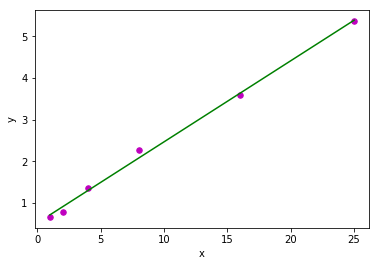

In [14]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    
    plt.scatter(x, y, color = "m",marker = "o", s = 30) 

    
    y_pred = b[0] + b[1]*x 

  
    plt.plot(x, y_pred, color = "g") 

 
    plt.xlabel('Dias') 
    plt.ylabel('Tempo') 

    plt.show() 

def main(): 
 
    x = dados.dias  
    y = dados.tempo  

    b = estimate_coef(x, y) 
    print("Coeficientes estimados:\nb_0 = {} b_1 = {}".format(b[0], b[1])) 

    
    plot_regression_line(x, y, b) 


main() 

tempo = 0.5154210526315779 +  0.19495488721804516*dias

In [15]:
dados['tempo_predito'] = 0.5154210526315779 + 0.19495488721804516*dados.dias

In [16]:
dados

,dias,tempo,tempo_predito
0,1,0.65,0.710376
1,2,0.79,0.905331
2,4,1.36,1.295241
3,8,2.26,2.075060
4,16,3.59,3.634699
5,25,5.36,5.389293


**2- Descreva as métricas de avaliação de desempenho de modelos: Recall e F1-score.  
Qual a vantagem sobre a acurácia e precisão?**

**3-  Utilize o dataset "weather_nominal.csv" disponível no moodle. Considere 70% das instâncias para treino e 30% para teste.  
Construa um modelo utilizando árvore de decisão para prever se uma pessoa vai jogar golf ou não.  
Qual o desempenho?  
Tente melhorar esse modelo e descreva como.**